## Example of use of Package PVSystems

Author: Mario Mañana. University of Cantabria

Email: mananam@unican.es

Version: 1.0

In [1]:
import sys
print(sys.version)

3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [2]:
from pvsystems import PVSystems as PVS
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Extraterrestrial radiation

### Extraterrestrial radiation. Computation for a specific day

Define input variable (day of the year)

i.e. 
2nd of february is n=31+2=33

In [3]:
S1=PVS()

In [4]:
n=33
Gon = S1.Gon( n)

In [5]:
print(str(np.round(Gon,2)) + " W/m^2")

1405.03 W/m^2


### Extraterrestrial radiation. Computation for a range of days

In [6]:
Nday = np.linspace(1, 365, 365)
Gsc = []

In [7]:
for d in Nday:
    Gsc.append( S1.Gon(d))

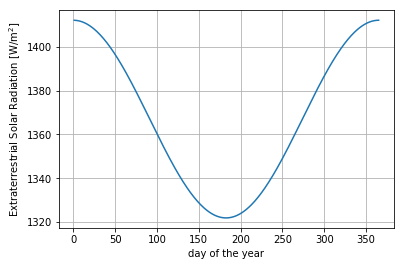

In [8]:
plt.plot(Nday,Gsc)
plt.xlabel('day of the year')
plt.ylabel('Extraterrestrial Solar Radiation [W/m$^2$]')
plt.grid()

## Equation of Time

### Computation of $E$ for a complete year

In [9]:
Ea = []

In [10]:
for d in Nday:
    Ea.append( S1.ET(d))

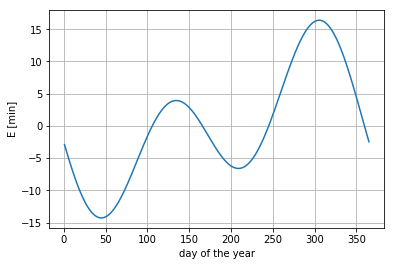

In [11]:
plt.plot(Nday,Ea)
plt.xlabel('day of the year')
plt.ylabel('E [min]')
plt.grid()

### Example of computation of solar time for Santander, Spain

3rd January, 11:50 

In [16]:
STD_Lat=43.46
STD_Lon=3.80
day=3
month=1
hour_std=11
min_std=50
Santander=PVS(Location='Santander', Latitude=STD_Lat, Longitude=STD_Lon)

In [17]:
# input: day .- Day of the month [1,31]
#        month .- Month of the year [1,12]
#        hour .- Hour std time [0,23]
#        minute .- Minute std time [0,59]
#        Long .- Longitude in degrees [0,360] East
# return: Solar time [minutes]
time_solar=Santander.StandardTimetoSolarTime( day, month, hour_std, min_std)
print('Solar Time: ' + str(time_solar) + ' min')
ET=Santander.ET( day)
print('ET: ' + str(ET) + ' min')
gg=Santander.StandardTimetoHM( time_solar, day, month)
print('Solar time: ' + str(gg[0]) + ':' + str(gg[1]))

Solar Time: 751.0 min
ET: -3.7946230880276857 min
Solar time: 13:31.0


### Example of computation of solar time for Madison, WI

3rd February, 10:30 

In [14]:
Madison_Lon=89.40
Madison_Lat=43.07
day=3
month=2
hour_std=10
min_std=30
Madison=PVS(Location='Madison', Country='USA', Latitude=Madison_Lat, Longitude=Madison_Lon)

In [15]:
# input: day .- Day of the month [1,31]
#        month .- Month of the year [1,12]
#        hour .- Hour std time [0,23]
#        minute .- Minute std time [0,59]
#        Long .- Longitude in degrees [0,360] East
# return: Solar time [minutes]
print('Longitude std: ' + str( Madison.LongStd()))
time_solar=Madison.StandardTimetoSolarTime( day, month, hour_std, min_std)
print('Solar Time: ' + str(time_solar) + ' min')
ET=Madison.ET( Madison.DayOfYear( day, month))
print('ET: ' + str(ET) + ' min')
gg=Madison.StandardTimetoHM( time_solar, day, month)
print('Solar time: ' + str(gg[0]) + ':' + str(gg[1]))

Longitude std: 90
Solar Time: 619.0 min
ET: -13.488456930500913 min
Solar time: 10:19.0


## Angle of incidence

Calculate the angle of incidence of beam radiation on a surface located at Madison, WI at 10:30 (solar time) on February 13, if the surface is tilted 45 degrees from the horizontal and pointed 15 degrees west of south.

In [19]:
Madison_Lon=89.40
Madison_Lat=43.07
day=13
month=2
hour_solar=10
min_solar=30
beta=45.0
gamma=15.0
Madison=PVS(Location='Madison', Country='USA', Latitude=Madison_Lat, Longitude=Madison_Lon)

In [21]:
theta=Madison.Theta( day, month, hour_solar, min_solar, gamma, beta)
print('Angle of incidence: ' + str(np.round(theta,2)) + ' degrees')

Angle of incidence: 35.19 degrees
